In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
from tvDatafeed import TvDatafeed, Interval
import statistics
import matplotlib.pyplot as plt

In [2]:
tv=TvDatafeed()

you are using nologin method, data you access may be limited


In [3]:
df=tv.get_hist(symbol='AAPL',exchange='NASDAQ',interval=Interval.in_daily, n_bars=200)

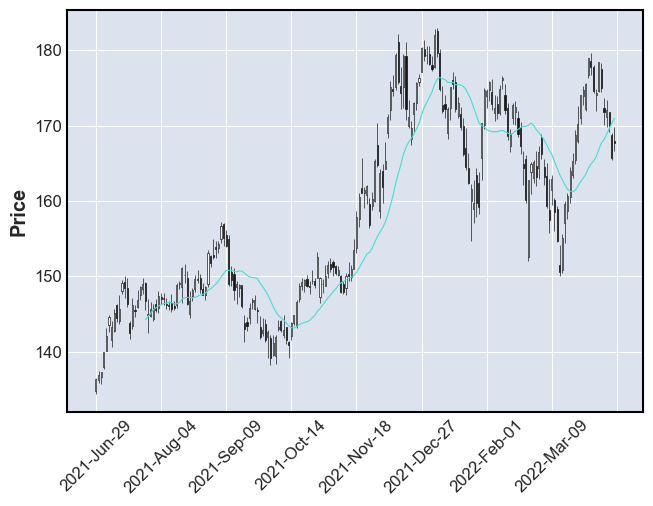

In [4]:
x=mpf.plot(df, type='candle', mav=(20))

In [5]:
df['sma_20days']=df['close'].rolling(window=20).mean()
df['upper_bollinger']=df['sma_20days']+df['close'].rolling(window=20).std()
df['lower_bollinger']=df['sma_20days']-df['close'].rolling(window=20).std()

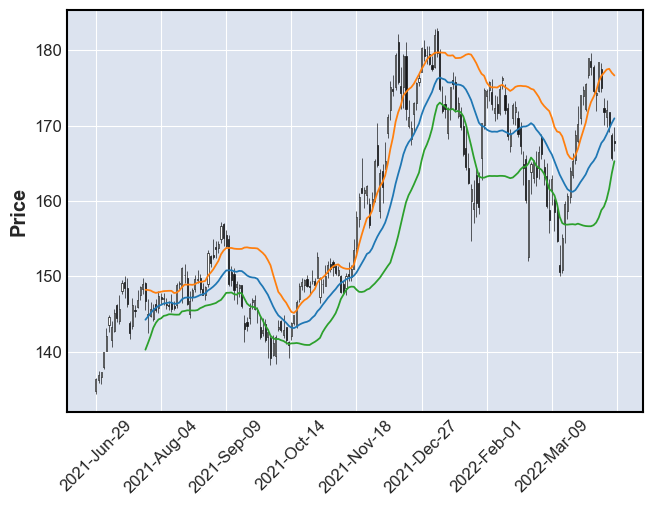

In [6]:
bollinger=df[['sma_20days','upper_bollinger','lower_bollinger']]
apd=[mpf.make_addplot(bollinger)]
op=mpf.plot(df,type='candle', volume=False, addplot=apd)

In [7]:
buy=np.where(df['close'].shift(1)<df['lower_bollinger'].shift(1),1,np.nan)*df['close']
sell=np.where(df['close'].shift(1)>df['upper_bollinger'].shift(1),1,np.nan)*df['close']

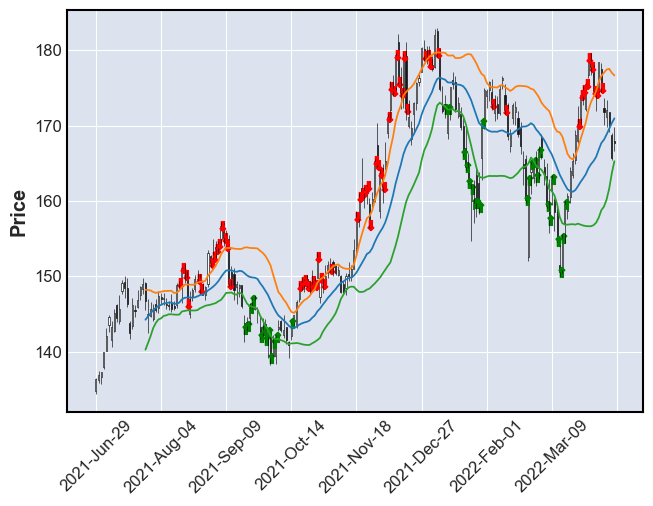

In [8]:
apd=[mpf.make_addplot(buy, scatter=True, markersize=50, marker=r'$\Uparrow$', color='green'),mpf.make_addplot(sell, scatter=True, markersize=50, marker=r'$\Downarrow$', color='red'),mpf.make_addplot(bollinger)]
mpf.plot(df, type='candle', volume=False, addplot=apd)

In [9]:
close_list = df['close'].values

In [10]:
sma20_list = df['sma_20days'].values
upper_sd_list = df['upper_bollinger'].values
lower_sd_list = df['lower_bollinger'].values

In [11]:
sell_arr = []
buy_arr = []
max_sell_arr = []
min_buy_arr = []


for i in range(20, len(close_list)):
    ma20 = sma20_list[i]
    upper = upper_sd_list[i]
    lower = lower_sd_list[i]
    if close_list[i] > upper:
        sell_arr.append(close_list[i])
    else:
        if len(sell_arr) > 0:
            max_sell_arr.append(max(sell_arr))
        sell_arr.clear()

if len(sell_arr) > 0:
    max_sell_arr.append(max(sell_arr))
print("SELL " + str(max_sell_arr), len(max_sell_arr))

for i in range(20, len(close_list)):
    ma20 = sma20_list[i]
    upper = upper_sd_list[i]
    lower = lower_sd_list[i]
    if close_list[i] < lower:
        buy_arr.append(close_list[i])
    else:
        if len(buy_arr) > 0:
            min_buy_arr.append(min(buy_arr))
        buy_arr.clear()

if len(buy_arr) > 0:
    min_buy_arr.append(min(buy_arr))

print("BUY " + str(min_buy_arr), len(min_buy_arr))

SELL [151.12, 149.71, 156.69, 152.57, 151.49, 161.94, 165.3, 179.45, 180.33, 182.01, 175.84, 176.28, 178.96, 178.44] 14
BUY [142.94, 139.14, 140.91, 172.0, 159.22, 160.07, 157.44, 150.62] 8


In [12]:
buy = 0
sell = 0
pos_held = 0
startBal = 1500
balance = startBal

In [13]:
for i in range(50, len(close_list)):
    # ma20 = sma20_list[i]
    # ma50 = sma50_list[i]
    last_price = close_list[i]
    if last_price in min_buy_arr and not pos_held:
        balance -= last_price
        pos_held = True
        buy += 1
    elif last_price in max_sell_arr and pos_held:
        balance += last_price
        pos_held = False  
        sell += 1


In [14]:
print("Buys: " + str(buy))
print("Sells: " + str(sell))

if buy > sell:
    balance += close_list[-1]


print("Final Balance: " + str(balance))

print("Profit if held: " + str(close_list[-1] - close_list[50]))
print("Profit from algorithm: " + str(balance - startBal))

Buys: 3
Sells: 3
Final Balance: 1532.36
Profit if held: 13.590000000000003
Profit from algorithm: 32.3599999999999
